## Chargement des donnée

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('P12-SalaryData.csv')

In [3]:

df.head(4)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0


## Visualisation de la distribution

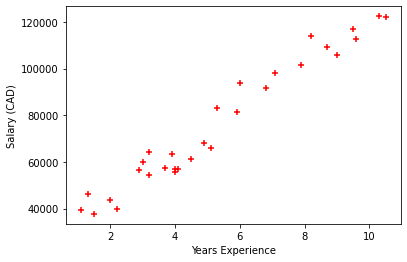

In [4]:
%matplotlib inline
plt.xlabel('Years Experience')
plt.ylabel('Salary (CAD)')
plt.scatter(df.YearsExperience,df.Salary, color='red', marker='+')

## Splite des donnée
70% for training | 30% for testing

In [5]:
from sklearn.model_selection import train_test_split

feature_col_names = list(df.columns)
feature_col_names = [ele for ele in feature_col_names if ele not in {'Salary'}]
predicted_class_names = ['Salary']
x = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=split_test_size, random_state=42)

## Creation de modèle - Regression Linéaire

In [6]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train.ravel())

LinearRegression()

## Perfomance sur les données de training

In [14]:
from sklearn import metrics

nb_predict_train = reg.predict(x_train)
print('Coefficients: \n', reg.coef_)
print('Coefficient of determination: {0:.4f}'.format(metrics.r2_score(y_train,nb_predict_train)))
print('Mean squared error: {0:.4f}'.format(metrics.mean_squared_error(y_train,nb_predict_train)))

Coefficients: 
 [9339.08172382]
Coefficient of determination: 0.9575
Mean squared error: 28922215.6124


## Perfomance sur les données de test

In [16]:
nb_predict_test = reg.predict(x_test)
print('Coefficients: \n', reg.coef_)
print('Coefficient of determination (R-Squared): {0:.4f}'.format(metrics.r2_score(y_test,nb_predict_test)))
print('Mean squared error: {0:.4f}'.format(metrics.mean_squared_error(y_test,nb_predict_test)))

Coefficients: 
 [9339.08172382]
Coefficient of determination (R-Squared): 0.9414
Mean squared error: 37784662.4662


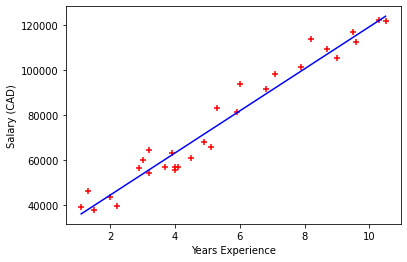

In [17]:
import statsmodels.api as sm

%matplotlib inline
plt.xlabel('Years Experience')
plt.ylabel('Salary (CAD)')
plt.scatter(df.YearsExperience,df.Salary, color='red', marker='+')
plt.plot(df.YearsExperience,reg.predict(df[['YearsExperience']]), color='blue')

In [18]:
x = df['YearsExperience']
y = df['Salary']

X2 = sm.add_constant(x)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 10 Jan 2021   Prob (F-statistic):           1.14e-20
Time:                        19:02:04   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     